# Instance Based Learning

A different class of learning.

Instead of performing explicit generalization, compares new problem instances with instances seen in training, which have been stored in memory

Up till now we have been doing the following. Given some data we will then determine some function and then "throw" away the data.

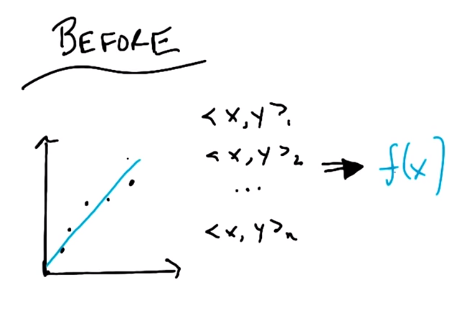

**NOW** We take all our data, put it into a database and then next time we get a new $x$, we look it up in the database. 

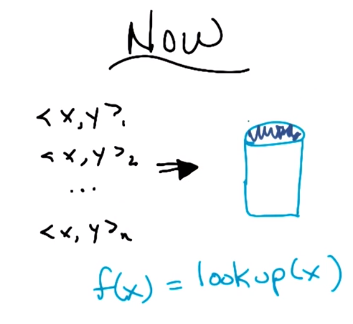

**First Impressions** (to be addressed)
* This model doesn't forget. If you put in an $(x,y)$ pair, you will get that exact same $y$ everytime you give it $x$
* There's no time spent learning
* Simple
* No generalisation - if the data isnt in the db then it doesn't know the result.
* Overfitting - by beliving the data to much 

# KNN - K nearest neighbors 

Takes k nearest neighbors to a point to decide what to label it. Where "distance" between points can be thought of as some similarity metric.

**Pseudo Code**
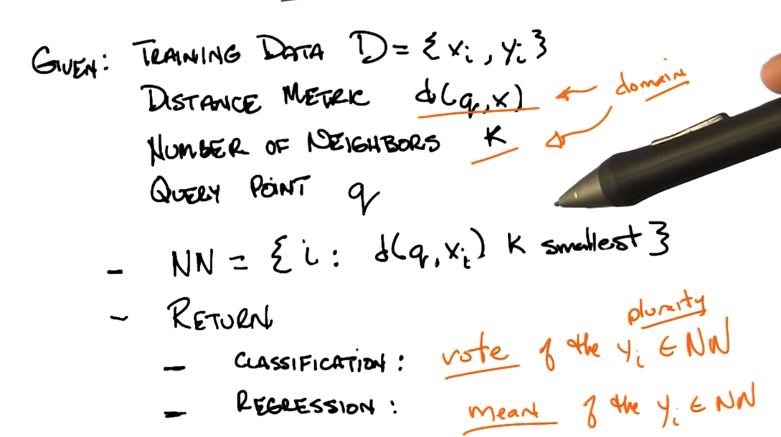
*Notes on return*

*Classification*
* Plurality- which ever one occures the most (the mode)
* When ties are reached, we can break them several ways. e.g. choose the one that occures the most globaly or pick it randomly
* Another example: weighted vote - points closest to the quary point hold more weight - example weight: $\frac{1}{\text{distance}}$

*Regression*
* What happens if all n points are the same distance from the point to be fit? How do we pick the k closest? Just take all of them, get the smallest number >= k 


**NOTE** Alot of the algorithm is left up to the designer; 
* How you apply the domain knowlage to define the similarity metric
* what you determine K to be
* how  you are going to break ties
* how voting is implemented

Take away: Depending on how this algorithm is implemented we could have radically different results.

# Big O quiz

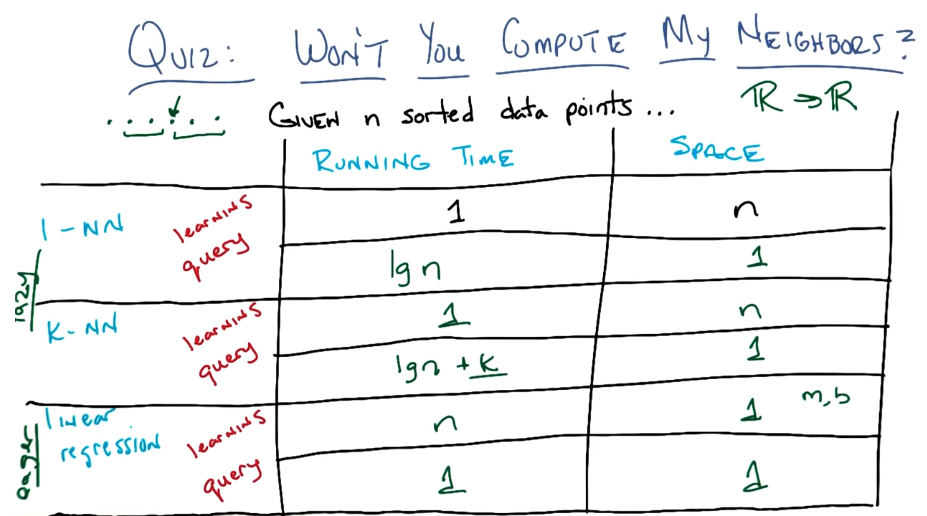


**1-NN**
* Quary speed: will be $LogN$ if we use binary search (as the results are sorted)
* Quary Space: 1 

**k-NN**
* Learning rate: $1$ like 1-NN. 
* Learning Space will also be n. 
* Quary run time: will be $LogN + K$ were by $K$ is the distance from the quary point that took $LogN$ to find; we don't know $LogN$s relation to $K$, the one could dominate the other and vice versa.
* Quary Space: 1 

**Linear Regression**
* Learning rate: $n$ - inverting a matrix in $R^1$ so we just need to populate the matrix.
* Learning Space: 1 - only two values passed to the regressor
* Quary Time: 1 - the regressor equation will take constant time to calculate
* Quary space: 1 

**Take away** 
* Learning was expensive while quarying was cheap for linear regression while for instance based models it is the opposite. 
* Somthing to think about; we could learn once but quary many times. 
* KNN are *lazy learners* - just in time learning
* Linear regression is an *eager learner* - learning before hand

# Quiz - Domain Knowledge
Demonstration of how a differnt similarity metric yields different results.
The true function that was used to create the true $y$ values: $y=x_1^2 + x_2$

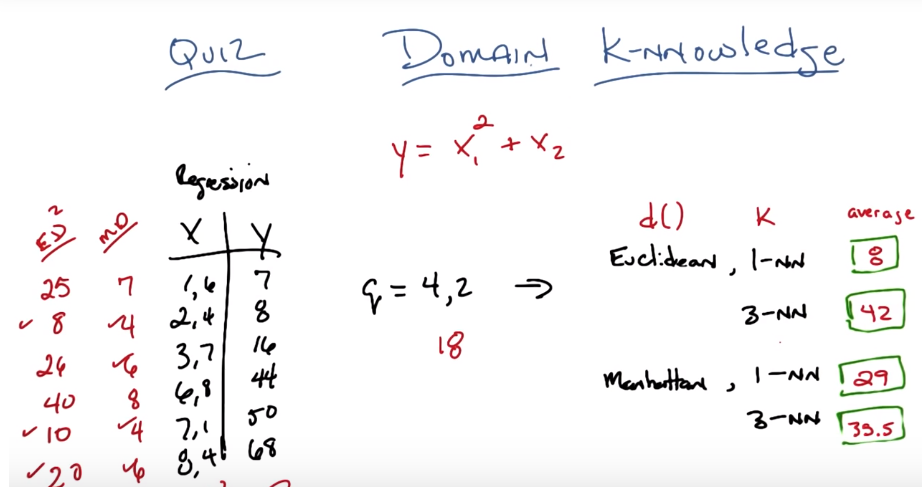

**Recall**
Where $x=(x_1,..x_n),y=(y_1..y_n)$

Manhatten Distance: $d=\sum^n_{i=1} |x_i - y_i|$

Euclidean Distance: $d=\sqrt{(x_1-y_1)^2+....+(x_n-y_n)^2}$

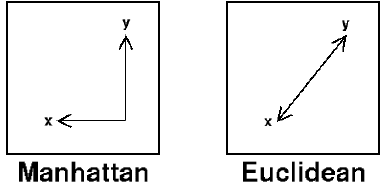

**Take away** Things like the similarity metric or $k$ make assumptions about the domain that might not be relevant.  

**Note** this example was designed to violate some assumptions inorder to produce bad results.

# K-NN Bias

*Preference Bias* - our beliefs about what makes a good hypothesis 

* Locality -> Near point are similar
* Smoothness -> averaging
* All Features matter equally

The results in the last quiz were so off because the first feature mattered more then the second one. We get a more accurate prediction if we define the similarity metric such that the first feature counts more. $d=(x_1+y_1)^2+|x_2-y_2|$

# Curese of dimensionality

As the number of feature grows, the amount of data we need to generalize accurate grows exponentially. 

This applies for all learning algorithms. Coverage is neccessary for learning.

**Take Away** better to add more data then add more features

**Example with K-nn**

Inorder to cover the same amount of (hyper volume) of space as we increase our dimensions, we need to increase the number of points. Notice how as the space increases the proportion of space that a single point coveres decreases.

This example shows a relationship $\text{O}(10^\text{dim})$

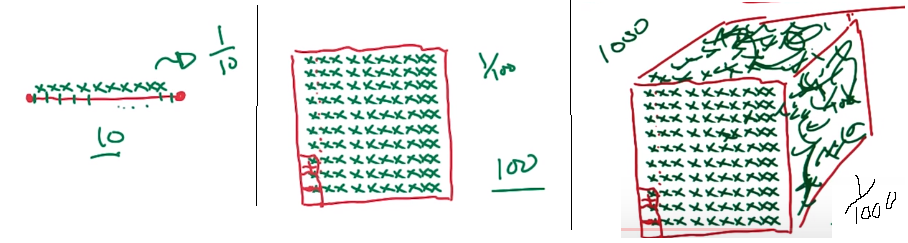

# Other stuff

**Distance Metric** is a black box, we can define them any way we want relevant to the domain.
* Continues
 * Euclidian
 * Manhattan
* Discrete
 * Mismatches 
 
**$K$ paramater**
What if $k=n$? All our quaries will yields the same result if the normal average of all $y$ points is used. Solution:
* Considered the weighed average of all points, then our quaries will have different results.
* Using the distance metrics to chose points to do a regresion. *Locallaly weighted regression*
    * $H \in lines$ -> but then the combination of lines for each group of points results in a hypothesis that represents non-linear functions